In [ ]:
#the dataset is imported from a google drive
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os #provides functions for interacting with the operating system

#Exploring the paths of the dataset. 
#This is where our data is stored.
print(os.listdir("/content/drive/MyDrive/SaaS/AI/"))
print(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray'))

['Machine.gsheet', 'DR.LITTLE.xlsx', 'Kibera.gsheet', 'chest_xray', 'Modified', '.ipynb_checkpoints', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'best_model.hdf5']
['.DS_Store', 'test', 'val', 'train']


##**Dataset**

The Chest X-ray data we are using is from [Cell](https://www.cell.com/cell/home). It divides the data into train, val, and test files.

1. The training image set are used to train the neural network
2. The testing image set evaluate the quality of the neural network
3. The validation set check underfitting or overfitting of the model and the results in real time

In [ ]:
#the dataset in the directory is divided into three sets: train, test and validation

data_dir = '/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray'

os.listdir(data_dir)
# this method is used to get the list of all files directories in the specified directory.

['.DS_Store', 'test', 'val', 'train']

In [ ]:
# the os.path.join() method is ued to join one or more path components intelligentlyinto a single path

# Each path contains normal and pneumonia x-ray images

train_dir = os.path.join(data_dir, 'train')

val_dir = os.path.join(data_dir, 'val')

test_dir = os.path.join(data_dir, 'test')

train_dir, val_dir, test_dir, os.listdir(train_dir), os.listdir(val_dir), os.listdir(test_dir)

('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train',
 '/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val',
 '/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test',
 ['.DS_Store', 'PNEUMONIA', 'NORMAL'],
 ['.DS_Store', 'NORMAL', 'PNEUMONIA'],
 ['.DS_Store', 'PNEUMONIA', 'NORMAL'])

#**Viewing the dataset**

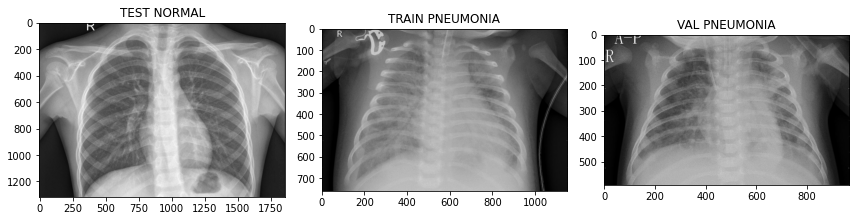

In [ ]:
import matplotlib.pyplot as plt 


# Plotting images from the datasets
img_test_normal = plt.imread('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img_train_pneumonia = plt.imread('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
img_val_pneumonia = plt.imread('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
plt.figure(figsize=(12, 5))

plt.subplot(1,3,1).set_title('TEST NORMAL')
plt.imshow(img_test_normal, cmap='gray')

plt.subplot(1,3,2).set_title('TRAIN PNEUMONIA')
plt.imshow(img_train_pneumonia, cmap='gray')

plt.subplot(1,3,3).set_title('VAL PNEUMONIA')
plt.imshow(img_val_pneumonia, cmap='gray')

plt.tight_layout()

### **Creating pandas dataframe the  dataset**

In [ ]:
import pandas as pd # data processing

# Getting image paths and creating pandas dataframe for each dataset (train/val/test)
train_n = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train/NORMAL/' + filename,0) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train/NORMAL'))]
train_p = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train/PNEUMONIA/' + filename,1) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train/PNEUMONIA'))]
val_p = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val/PNEUMONIA' + filename,1) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val/PNEUMONIA'))]
val_n = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val/NORMAL/' + filename,0) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val/NORMAL'))]
test_n = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test/NORMAL/' + filename,0) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test/NORMAL'))]
test_p = [('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test/PNEUMONIA/' + filename,1) for count, filename in enumerate(os.listdir('/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test/PNEUMONIA'))]

train_data = pd.DataFrame(train_p + train_n, columns=['image_path', 'label'],index=None)
val_data = pd.DataFrame(val_p + val_n, columns=['image_path', 'label'],index=None)
test_data = pd.DataFrame(test_p + test_n, columns=['image_path', 'label'],index=None)

We next check the dataset balance by plotting the image count for each class in each dataframe.

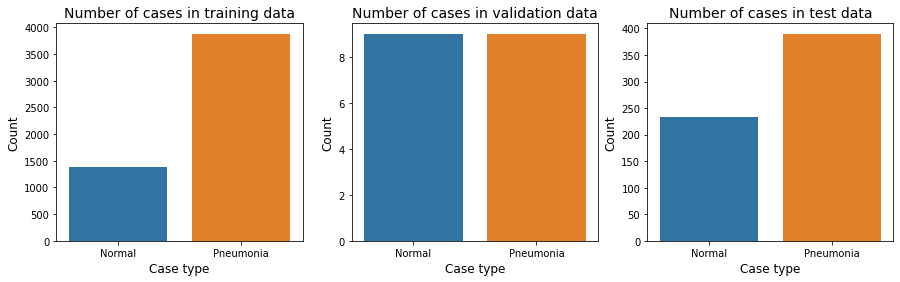

In [ ]:
import seaborn as sb
# Count plot of the class representations.

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sb.countplot(data= train_data, x='label')
plt.title('Number of cases in training data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(train_data.label.unique())), ['Normal', 'Pneumonia'])

plt.subplot(1,3,2)
sb.countplot(data= val_data, x='label')
plt.title('Number of cases in validation data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(val_data.label.unique())), ['Normal', 'Pneumonia'])

plt.subplot(1,3,3)
sb.countplot(data= test_data, x='label')
plt.title('Number of cases in test data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(test_data.label.unique())), ['Normal', 'Pneumonia']);

The bar graph shows an imabalance in the data represented across the image paths. There is not enough validation data to train the model therefore we borrow some from the traning data.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from glob import glob
import numpy as np
import cv2

# glob is a powerful tool in Python to help with file management and filtering. Glob helps to filter through large datasets and pull out only files that are of interest.

# Get the path to the sub-directories

cases_dir = "/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/val"


#glob uses different operators to broaden its searching abilities. The primary operator is *.

normal_cases = glob(cases_dir+ "/NORMAL/*.jpeg") 
pneumonia_cases = glob(cases_dir+ "/PNEUMONIA/*.jpeg")

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []


# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[1] ==1:
      img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (16, 224, 224, 3)
Total number of labels: (16, 2)


In [ ]:
import pandas as pd


# Get the path to the normal and pneumonia sub-directories

cases_d = "/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/train"

# Get the list of all the images
normal_cases = glob(cases_d+ "/NORMAL/*.jpeg") 
pneumonia_cases = glob(cases_d+ "/PNEUMONIA/*.jpeg")

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,/content/drive/MyDrive/SaaS/AI/chest_xray/ches...,0
1,/content/drive/MyDrive/SaaS/AI/chest_xray/ches...,1
2,/content/drive/MyDrive/SaaS/AI/chest_xray/ches...,1
3,/content/drive/MyDrive/SaaS/AI/chest_xray/ches...,1
4,/content/drive/MyDrive/SaaS/AI/chest_xray/ches...,1


## **Data Augmentation**

Data augmentation is a great technique which helps in almost every case for improving the robustness of a model, especially when the dataset is imbalanced. It refers to the enhancement of incomplete or scarse images in the dataset for the purpose of machine learning. In this notebook I use
imgaug because it comes with a very clean api and offers various augmentations methods.

In [ ]:
import imgaug.augmenters as iaa
 
# Augmentation sequence 
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

### **Training data generator**

In [ ]:
#this is a simple data generator.

def data_gen(data, batch_size):
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            
            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0

In [ ]:

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization


def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)
    
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [ ]:
from keras.models import Model
model =  build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2_1 (SeparableConv2D)    (None, 112, 112, 128)     8896      
_________________________________________________________________
Conv2_2 (SeparableConv2D)    (None, 112, 112, 128)     17664     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0     

In [ ]:
import h5py
h5py.run_tests()

1

The h5py package is a Pythonic interface to the HDF5 binary data format. It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.

In [ ]:
import h5py

# Open the VGG16 weight file
f = h5py.File('/content/drive/MyDrive/SaaS/AI/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5' ,'r')

# Select the layers for which you want to set weight.

w,b = f['block1_conv1']['block1_conv1_W_1:0'], f['block1_conv1']['block1_conv1_b_1:0']
model.layers[1].set_weights = [w,b]

w,b = f['block1_conv2']['block1_conv2_W_1:0'], f['block1_conv2']['block1_conv2_b_1:0']
model.layers[2].set_weights = [w,b]

w,b = f['block2_conv1']['block2_conv1_W_1:0'], f['block2_conv1']['block2_conv1_b_1:0']
model.layers[4].set_weights = [w,b]

w,b = f['block2_conv2']['block2_conv2_W_1:0'], f['block2_conv2']['block2_conv2_b_1:0']
model.layers[5].set_weights = [w,b]

f.close()
model.summary()    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2_1 (SeparableConv2D)    (None, 112, 112, 128)     8896      
_________________________________________________________________
Conv2_2 (SeparableConv2D)    (None, 112, 112, 128)     17664     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0     

In [ ]:

import tensorflow as tf
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# opt = RMSprop(lr=0.0001, decay=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)

In [ ]:
batch_size = 16
nb_epochs = 20

# Get a train data generator
train_data_gen = data_gen(data=train_data, batch_size=batch_size)

# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size

print("Number of training and validation steps: {} and {}".format(nb_train_steps, len(valid_data)))

Number of training and validation steps: 328 and 16


In [ ]:
# # Fit the model
history = model.fit_generator(train_data_gen, epochs=nb_epochs, steps_per_epoch=nb_train_steps,
                              validation_data=(valid_data, valid_labels),callbacks=[es, chkpt],
                              class_weight={0:1.0, 1:0.4})

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
328/328 [==============================] - 1507s 5s/step - loss: 0.2372 - accuracy: 0.7561 - val_loss: 0.8157 - val_accuracy: 0.5000
Epoch 2/20
328/328 [==============================] - 780s 2s/step - loss: 0.0731 - accuracy: 0.9501 - val_loss: 1.5083 - val_accuracy: 0.5000
Epoch 3/20
328/328 [==============================] - 469s 1s/step - loss: 0.0583 - accuracy: 0.9617 - val_loss: 1.2745 - val_accuracy: 0.5000
Epoch 4/20
328/328 [==============================] - 291s 888ms/step - loss: 0.0455 - accuracy: 0.9699 - val_loss: 0.3355 - val_accuracy: 0.8750
Epoch 5/20
328/328 [==============================] - 216s 658ms/step - loss: 0.0390 - accuracy: 0.9743 - val_loss: 0.0968 - val_accuracy: 0.9375
Epoch 6/20
328/328 [==============================] - 178s 542ms/step - loss: 0.0436 - accuracy: 0.9695 - val_loss: 0.2705 - val_accuracy: 0.8750
Epoch 7/20
328/328 [==============================] - 172s 525ms/step - loss: 0.0332 - accuracy: 0.9788 - val_loss: 0.1724 - val_acc

In [ ]:
# Load the model weights
model.load_weights("/content/drive/MyDrive/SaaS/AI/best_model.hdf5", by_name = True)

In [ ]:
# Preparing test data


case_dir = "/content/drive/MyDrive/SaaS/AI/chest_xray/chest_xray/test"


normal_cases = glob(case_dir+ "/NORMAL/*.jpeg") 
pneumonia_cases = glob(case_dir+ "/PNEUMONIA/*.jpeg")

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 224, 224, 3)
Total number of labels: (624, 2)


In [ ]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

39/39 [==============================] - 5s 120ms/step - loss: 2.0769 - accuracy: 0.6955
Loss on test set:  2.0768985748291016
Accuracy on test set:  0.6955128312110901


In [ ]:
# Get predictions
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(624,)
(624,)


<Figure size 432x288 with 0 Axes>

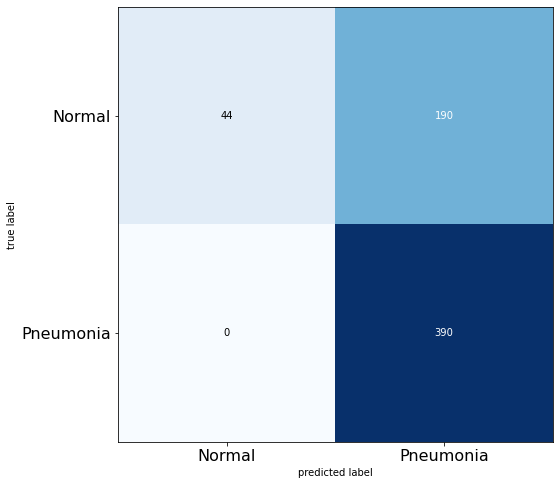

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [ ]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 1.00
Precision of the model is 0.67
